# 최동원 선수 연봉 예측 (문제2 ~ 3)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# matplotlib.pyplot 한글 깨짐 방지
import platform
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    print("Hangul Setting OK for Mac")
    rc("font", family = "Arial Unicode MS")
elif platform.system() == "Windows":
    print("This py not setting for Window sry")
else:
    print("We don't know System")
    
plt.rcParams["axes.unicode_minus"] = False


Hangul Setting OK for Mac


## 문제2. 데이터 매핑

### 데이터 가져오기

In [5]:
# 크롤링 후 정리도니 데이터 불러오기
pitcher_8388 = pd.read_csv('./1983-1988년 투수 데이터.csv', index_col=0) # 83 - 88년 투수 데이터
pitcher_1520 = pd.read_csv('./2015-2020년 투수 데이터.csv', index_col=0) # 15 - 20년 투수 데이터
team_pitcher_avg_df = pd.read_csv('./KBO_TEAM_DATA.csv', index_col=0) # 82 - 21년 KBO 소속 팀의 투수들 평균 데이터(개인 데이터 X)

In [6]:
# 83 - 88년 투수 데이터
pitcher_8388.head()

,rank,name,birth,team,year,gp,cg,sho,gs,win,...,balk,wild,ERA,FIP,WHIP,ERAplus,FIPplus,WAR,WPA,relief_WAR
0,1.0,선동열,1963-01-10,Haitai Tigers,1986,39.0,19.0,8.0,22.0,24.0,...,2.0,3.0,0.99,1.16,0.78,307.1,262.7,14.89,0.0,6.18
1,2.0,장명부,1950-12-27,Samsung Lions,1983,60.0,36.0,5.0,44.0,30.0,...,1.0,6.0,2.34,2.42,1.16,143.4,138.5,13.63,0.0,5.68
2,3.0,선동열,1963-01-10,Haitai Tigers,1988,31.0,9.0,1.0,12.0,16.0,...,1.0,0.0,1.21,1.26,0.85,316.2,303.8,11.79,0.0,4.89
3,4.0,최동원,1958-05-24,Lotte Giants,1986,39.0,17.0,4.0,21.0,19.0,...,0.0,2.0,1.55,1.49,0.97,191.8,200.0,11.74,0.0,4.64
4,5.0,김시진,1958-03-20,Samsung Lions,1985,47.0,10.0,2.0,29.0,25.0,...,1.0,10.0,2.00,2.59,1.09,177.3,137.0,10.52,0.0,3.97


In [7]:
pitcher_1520.head()

,rank,name,birth,team,year,gp,cg,sho,gs,win,...,wild,ERA,FIP,WHIP,ERAplus,FIPplus,WAR,WPA,relief_WAR,salary
0,1.0,알칸타라,1992-12-04,두산 베어스,2020,31.0,1.0,0.0,31.0,20.0,...,3.0,2.54,3.10,1.03,182.6,149.7,8.31,4.35,NaN,45000
1,2.0,양현종,1988-03-01,KIA 타이거즈,2015,32.0,1.0,1.0,31.0,15.0,...,6.0,2.44,4.57,1.24,202.1,108.5,8.14,3.94,3.89,75000
2,3.0,스트레일리,1988-12-01,롯데 자이언츠,2020,31.0,0.0,0.0,31.0,15.0,...,4.0,2.50,3.01,1.02,195.1,159.0,7.53,3.84,NaN,50000
3,4.0,양현종,1988-03-01,KIA 타이거즈,2019,29.0,2.0,2.0,29.0,16.0,...,1.0,2.29,2.63,1.07,183.1,160.3,7.35,3.81,NaN,230000
4,5.0,브룩스,1990-04-27,KIA 타이거즈,2020,23.0,1.0,1.0,23.0,11.0,...,3.0,2.50,2.72,1.02,192.2,177.8,7.16,3.39,NaN,47900


In [8]:
team_pitcher_avg_df.head()

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79


In [9]:
pitcher_1520['team'].unique()

array(['두산 베어스', 'KIA 타이거즈', '롯데 자이언츠', 'SK 와이번스', 'LG 트윈스', '넥센 히어로즈',
       'NC 다이노스', '키', 'kt wiz', '삼성 라이온즈', '한화 이글스', '넥센 히어로즈 kt wiz',
       'SK 와이번스 롯데 자이언츠', 'kt wiz 롯데 자이언츠', 'NC 다이노스 kt wiz',
       'KIA 타이거즈 두산 베어스', 'SK 와이번스 넥센 히어로즈', 'LG 트윈스 SK 와이번스',
       '한화 이글스 SK 와이번스', '넥센 히어로즈 KIA 타이거즈', 'KIA 타이거즈 NC 다이노스',
       '롯데 자이언츠 두산 베어스', 'SK 와이번스 LG 트윈스', 'KIA 타이거즈 한화 이글스',
       'SK 와이번스 KIA 타이거즈', '롯데 자이언츠 kt wiz', 'kt wiz 넥센 히어로즈',
       'kt wiz LG 트윈스', '한화 이글스 LG 트윈스', '두산 베어스 롯데 자이언츠',
       'LG 트윈스 한화 이글스', 'NC 다이노스 두산 베어스', '한화 이글스 KIA 타이거즈',
       'KIA 타이거즈 SK 와이번스', 'NC 다이노스 KIA 타이거즈'], dtype=object)

In [10]:
pitcher_8388['team'].unique()

array(['Haitai Tigers', 'Samsung Lions', 'Lotte Giants', 'Binggre Eagles',
       'MBC Blue Dragons', 'OB Bears', 'Chungbo Pintos',
       'Pacific Dolphins', 'Haitai Tigers Binggre Eagles'], dtype=object)

In [11]:
team_pitcher_avg_df['team'].unique()

array(['LG Twins', 'KT Wiz', 'Doosan Bears', 'Samsung Lions', 'NC Dinos',
       'Kiwoom Heroes', 'SSG Landers', 'Hanwha Eagles', 'Kia Tigers',
       'Lotte Giants'], dtype=object)

### 데이터 전처리

#### 모든 데이터 팀명 표기 통합
- 영어 이름으로 통일.
- 현재(2023년) 기준 사용중인 팀명으로 통일

 ```
2018 ['Nexen Heroes'] -> 2019 ['Kiwoom Heroes']

2020 ['SK Wyverns'] -> 2021 ['SSG Landers']

 1.  Sammi Superstars  -> Chungbo Pintos
 2.  Chungbo Pintos  -> Pacific Dolphins
 3.  MBC Blue Dragons  -> LG Twins
 4.  Binggre Eagles  -> Hanwha Eagles
 5.  Pacific Dolphins  -> Hyundai Unicorns
 6.  OB Bears  -> Doosan Bears
 7.  Ssangbangwool Raiders  -> SK Wyverns
 8.  Haitai Tigers  -> Kia Tigers
 9.  Hyundai Unicorns  -> Woori Heroes
10.  Woori Heroes  -> Nexen Heroes
11.  Nexen Heroes  -> Kiwoom Heroes
12.  SK Wyverns  -> SSG Landers
 ```

In [12]:
old_team_name = {
    'Sammi Superstars' : 'Chungbo Pintos',
    'Chungbo Pintos' : 'Pacific Dolphins',
    'MBC Blue Dragons' : 'LG Twins',
    'Binggre Eagles' : 'Hanwha Eagles',
    'Pacific Dolphins' : 'Hyundai Unicorns',
    'OB Bears' : 'Doosan Bears',
    'Ssangbangwool Raiders' : 'SK Wyverns',
    'Haitai Tigers' : 'Kia Tigers',
    'Hyundai Unicorns' :'Woori Heroes',
    'Woori Heroes' : 'Nexen Heroes',
    'Nexen Heroes' : 'Kiwoom Heroes',
    'SK Wyverns' : 'SSG Landers'
}

now_team_name = {
    'LG 트윈스' : 'LG Twins',
    'kt wiz' : 'KT Wiz',
    '두산 베어스' : 'Doosan Bears',
    '삼성 라이온즈' : 'Samsung Lions',
    'NC 다이노스' : 'NC Dinos',
    '키움 히어로즈' : 'Kiwoom Heroes',
    'SSG 랜더스' : 'SSG Landers',
    '한화 이글스' : 'Hanwha Eagles',
    'KIA 타이거즈' : 'Kia Tigers',
    '롯데 자이언츠' : 'Lotte Giants'
}


In [13]:
# 넥센 -> 키움 / sk -> SSG으로 수정, '키'로 키움 히어로즈로 처리되지 않은 데이터가 존재하여 추가로 수정작업 진행
for idx, t_name in enumerate(pitcher_1520['team']):
    tmp_name = t_name
    if '넥센 히어로즈' in t_name:
        tmp_name = tmp_name.replace('넥센 히어로즈','키움 히어로즈')
    if t_name == '키' :
        tmp_name = tmp_name.replace('키','키움 히어로즈')
    if 'SK 와이번스' in t_name:
        tmp_name = tmp_name.replace('SK 와이번스','SSG 랜더스')
    
    pitcher_1520['team'].iloc[idx] = tmp_name
    
        

/Users/seokholee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
pitcher_1520['team'].unique()

array(['두산 베어스', 'KIA 타이거즈', '롯데 자이언츠', 'SSG 랜더스', 'LG 트윈스', '키움 히어로즈',
       'NC 다이노스', 'kt wiz', '삼성 라이온즈', '한화 이글스', '키움 히어로즈 kt wiz',
       'SSG 랜더스 롯데 자이언츠', 'kt wiz 롯데 자이언츠', 'NC 다이노스 kt wiz',
       'KIA 타이거즈 두산 베어스', 'SSG 랜더스 키움 히어로즈', 'LG 트윈스 SSG 랜더스',
       '한화 이글스 SSG 랜더스', '키움 히어로즈 KIA 타이거즈', 'KIA 타이거즈 NC 다이노스',
       '롯데 자이언츠 두산 베어스', 'SSG 랜더스 LG 트윈스', 'KIA 타이거즈 한화 이글스',
       'SSG 랜더스 KIA 타이거즈', '롯데 자이언츠 kt wiz', 'kt wiz 키움 히어로즈',
       'kt wiz LG 트윈스', '한화 이글스 LG 트윈스', '두산 베어스 롯데 자이언츠',
       'LG 트윈스 한화 이글스', 'NC 다이노스 두산 베어스', '한화 이글스 KIA 타이거즈',
       'KIA 타이거즈 SSG 랜더스', 'NC 다이노스 KIA 타이거즈'], dtype=object)

In [15]:
# 영문 이름으로 변경
for idx, t_name in enumerate(pitcher_1520['team']):
    tmp_name = t_name
    for k,v in now_team_name.items():
        if k in t_name:
            tmp_name = tmp_name.replace(k,v)
            
    pitcher_1520['team'].iloc[idx] = tmp_name

In [16]:
pitcher_1520['team'].unique()

array(['Doosan Bears', 'Kia Tigers', 'Lotte Giants', 'SSG Landers',
       'LG Twins', 'Kiwoom Heroes', 'NC Dinos', 'KT Wiz', 'Samsung Lions',
       'Hanwha Eagles', 'Kiwoom Heroes KT Wiz',
       'SSG Landers Lotte Giants', 'KT Wiz Lotte Giants',
       'NC Dinos KT Wiz', 'Kia Tigers Doosan Bears',
       'SSG Landers Kiwoom Heroes', 'LG Twins SSG Landers',
       'Hanwha Eagles SSG Landers', 'Kiwoom Heroes Kia Tigers',
       'Kia Tigers NC Dinos', 'Lotte Giants Doosan Bears',
       'SSG Landers LG Twins', 'Kia Tigers Hanwha Eagles',
       'SSG Landers Kia Tigers', 'Lotte Giants KT Wiz',
       'KT Wiz Kiwoom Heroes', 'KT Wiz LG Twins',
       'Hanwha Eagles LG Twins', 'Doosan Bears Lotte Giants',
       'LG Twins Hanwha Eagles', 'NC Dinos Doosan Bears',
       'Hanwha Eagles Kia Tigers', 'Kia Tigers SSG Landers',
       'NC Dinos Kia Tigers'], dtype=object)

In [17]:
pitcher_8388['team'].unique()

array(['Haitai Tigers', 'Samsung Lions', 'Lotte Giants', 'Binggre Eagles',
       'MBC Blue Dragons', 'OB Bears', 'Chungbo Pintos',
       'Pacific Dolphins', 'Haitai Tigers Binggre Eagles'], dtype=object)

In [18]:
# 과거 팀명을 현재 사용중인 팀명으로 변경
for idx, t_name in enumerate(pitcher_8388['team']):
    tmp_name = t_name
    for k,v in old_team_name.items():
        if k in tmp_name:
            tmp_name = tmp_name.replace(k,v)
            
    pitcher_8388['team'].iloc[idx] = tmp_name

In [19]:
pitcher_8388['team'].unique()

array(['Kia Tigers', 'Samsung Lions', 'Lotte Giants', 'Hanwha Eagles',
       'LG Twins', 'Doosan Bears', 'Kiwoom Heroes',
       'Kia Tigers Hanwha Eagles'], dtype=object)

#### 투수 평가를 위한 지표 추가
- 9이닝당 탈삼진, 볼넷에 대한 지표 추가
- 스포츠 선수에게 나이는 중요한 지표이기 때문에 나이 컬럼 추가

In [21]:
# 9이닝당 탈삼진, 볼넷 지표 추가
pitcher_1520['K/9'] = pitcher_1520['so'] * 9 / pitcher_1520['inning']
pitcher_1520['BB/9'] = pitcher_1520['walk'] * 9 / pitcher_1520['inning']

pitcher_8388['K/9'] = pitcher_8388['so'] * 9 / pitcher_8388['inning']
pitcher_8388['BB/9'] = pitcher_8388['walk'] * 9 / pitcher_8388['inning']

In [22]:
# 나이 컬럼 추가
age = [] 
for idx, rows in pitcher_1520.iterrows():
    age.append(rows['year'] - int(rows['birth'][:4]))

pitcher_1520['age'] = age


age = [] 
for idx, rows in pitcher_8388.iterrows():
    age.append(rows['year'] - int(rows['birth'][:4]))

pitcher_8388['age'] = age

In [23]:
pitcher_1520.head()

,rank,name,birth,team,year,gp,cg,sho,gs,win,...,WHIP,ERAplus,FIPplus,WAR,WPA,relief_WAR,salary,K/9,BB/9,age
0,1.0,알칸타라,1992-12-04,Doosan Bears,2020,31.0,1.0,0.0,31.0,20.0,...,1.03,182.6,149.7,8.31,4.35,NaN,45000,8.264379,1.362260,28
1,2.0,양현종,1988-03-01,Kia Tigers,2015,32.0,1.0,1.0,31.0,15.0,...,1.24,202.1,108.5,8.14,3.94,3.89,75000,7.675177,3.813145,27
2,3.0,스트레일리,1988-12-01,Lotte Giants,2020,31.0,0.0,0.0,31.0,15.0,...,1.02,195.1,159.0,7.53,3.84,NaN,50000,9.500515,2.363543,32
3,4.0,양현종,1988-03-01,Kia Tigers,2019,29.0,2.0,2.0,29.0,16.0,...,1.07,183.1,160.3,7.35,3.81,NaN,230000,7.964169,1.612378,31
4,5.0,브룩스,1990-04-27,Kia Tigers,2020,23.0,1.0,1.0,23.0,11.0,...,1.02,192.2,177.8,7.16,3.39,NaN,47900,7.743216,1.429517,30


In [24]:
pitcher_8388.head()

,rank,name,birth,team,year,gp,cg,sho,gs,win,...,FIP,WHIP,ERAplus,FIPplus,WAR,WPA,relief_WAR,K/9,BB/9,age
0,1.0,선동열,1963-01-10,Kia Tigers,1986,39.0,19.0,8.0,22.0,24.0,...,1.16,0.78,307.1,262.7,14.89,0.0,6.18,7.345538,1.784897,23
1,2.0,장명부,1950-12-27,Samsung Lions,1983,60.0,36.0,5.0,44.0,30.0,...,2.42,1.16,143.4,138.5,13.63,0.0,5.68,4.635917,2.233669,33
2,3.0,선동열,1963-01-10,Kia Tigers,1988,31.0,9.0,1.0,12.0,16.0,...,1.26,0.85,316.2,303.8,11.79,0.0,4.89,10.106682,1.768669,25
3,4.0,최동원,1958-05-24,Lotte Giants,1986,39.0,17.0,4.0,21.0,19.0,...,1.49,0.97,191.8,200.0,11.74,0.0,4.64,7.011236,1.853933,28
4,5.0,김시진,1958-03-20,Samsung Lions,1985,47.0,10.0,2.0,29.0,25.0,...,2.59,1.09,177.3,137.0,10.52,0.0,3.97,6.719911,4.045319,27


In [52]:
# 지표가 있지만 연봉이 없거나 이닝수가 없는 경우 예측에 방해되기 때문에 삭제
pitcher_1520.drop(pitcher_1520[pitcher_1520['salary']==0].index ,inplace=True)
pitcher_1520.drop(pitcher_1520[pitcher_1520['inning']==0].index, inplace=True)
pitcher_1520.reset_index(drop=True, inplace=True)
len(pitcher_1520)

1363

#### 데이터 분석을 위한 칼럼 정리

In [54]:
pitcher_1520.columns

Index(['rank', 'name', 'birth', 'team', 'year', 'gp', 'cg', 'sho', 'gs', 'win',
       'loss', 'save', 'hold', 'inning', 'runs', 'earned_run', 'batter_faced',
       'hits', 'base2', 'base3', 'home_run', 'walk', 'intentional_walk', 'hb',
       'so', 'balk', 'wild', 'ERA', 'FIP', 'WHIP', 'ERAplus', 'FIPplus', 'WAR',
       'WPA', 'relief_WAR', 'salary', 'K/9', 'BB/9', 'age'],
      dtype='object')

```
사용할 칼럼 목록
타겟 칼럼 - salary(연봉)
사용 칼럼 - gp(게임 수), sho(완봉승), gs(선발), win(승리수), save(세이브), inning(이닝 수), ERA(자책점), WHIP(이닝당 볼넷과 안타를 내준 수), FIP(수비 실책을 제외한 투수 평가 지표), WAR(승리 기여 점수), K/9(9이닝당 탈삼진 수), BB/9(9이닝당 볼넷 수), age(나이)

relief_WAR((구원)승리 기여 점수) : 최동원 선수가 구원 투수로도 활동했었기 때문에 해당 지표를 추가해야하는가에 대한 문제가 있음. 현재 갖고 있는 데이터중 선발로만 활동한 선수들의 데이터가 있고 그 선수들은 이 지표가 없기 때문에 연봉과 상관관계가 높다면 예측에 문제가 됨.
```

#### 연봉과의 상관관계

In [211]:
use_col = ['gp', 'sho', 'gs', 'win',
        'save', 'inning', 'ERA', 'WHIP', 'FIP','WAR', 'K/9', 'BB/9', 'age', 'salary']

df_1520 = pitcher_1520[use_col]

In [212]:
pitcher_1520[use_col[:-1]].isnull().sum()

gp        0
sho       0
gs        0
win       0
save      0
inning    0
ERA       0
WHIP      0
FIP       0
WAR       0
K/9       0
BB/9      0
age       0
dtype: int64

In [213]:
#relief_WAR Nan -> 0
pitcher_1520 = pitcher_1520.fillna(0)

In [214]:
df_1520.corr().sort_values('salary', ascending=False)[['salary']]

,salary
salary,1.000000
win,0.562161
WAR,0.561638
inning,0.550213
gs,0.507891
age,0.360999
sho,0.288077
save,0.135576
gp,0.130175
K/9,0.026985


<AxesSubplot:>

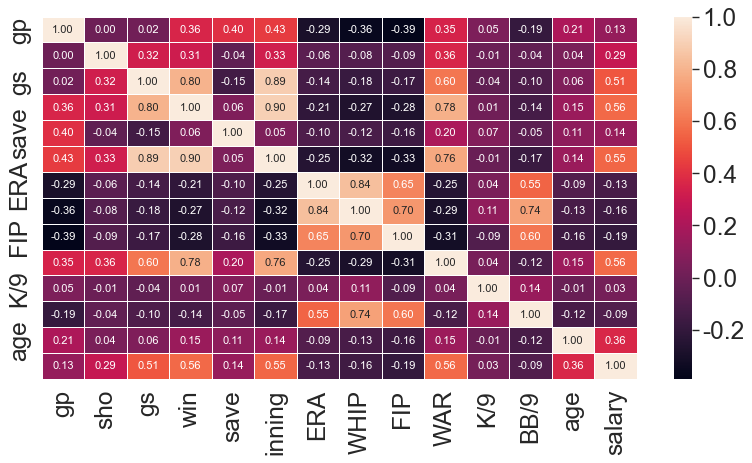

In [483]:
plt.figure(figsize=(12,6), dpi=80)
sns.heatmap(df_1520.corr(), linewidths=0.5, annot=True, fmt='.2f', annot_kws={"size" : 10})

relief_WAR의 상관관계가 약 0.5로 높은 지표로 나왔기 때문에 위에서 언급한 바와 같이 전체 투수 데이터와 선발, 구원 모두 활동한 데이터 두 기준으로 예측 진행.

#### 스케일러
- Minmax, Standard, Roubst

In [215]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def mm_scaler(df, use_cols, getScaler=True):
    mm = MinMaxScaler()

    result = df[use_cols]

    scaled_df = mm.fit_transform(result)
    if getScaler:
        return mm, pd.DataFrame(scaled_df, index=df.index, columns=use_cols)
    else:
        return pd.DataFrame(scaled_df, index=df.index, columns=use_cols)

def std_scaler(df, use_cols, getScaler=True):
    std = StandardScaler()
    
    result = df[use_cols]

    scaled_df = std.fit_transform(result)
    if getScaler:
        return std, pd.DataFrame(scaled_df, index=df.index, columns=use_cols)
    else:
        return pd.DataFrame(scaled_df, index=df.index, columns=use_cols)
    

def rob_scaler(df, use_cols, getScaler=True):
    rob = RobustScaler()

    result = df[use_cols]

    scaled_df = rob.fit_transform(result)
    if getScaler:
        return rob, pd.DataFrame(scaled_df, index=df.index, columns=use_cols)
    else:
        return pd.DataFrame(scaled_df, index=df.index, columns=use_cols)

In [216]:
# X 데이터
mm_df = mm_scaler(pitcher_1520, use_col[:-1], getScaler=False)
std_df = std_scaler(pitcher_1520, use_col[:-1], getScaler=False)
rob_df = rob_scaler(pitcher_1520, use_col[:-1], getScaler=False)

# y 데이터
salary_mm_scaler, mm_salary = mm_scaler(pitcher_1520, ['salary'])
salary_std_scaler, std_salary = std_scaler(pitcher_1520, ['salary'])
salary_rob_scaler, rob_salary = rob_scaler(pitcher_1520, ['salary'])

#### 선형 회귀 모델 적용

In [383]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm


def ols(X_train, y_train):
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train).fit()
    return model.summary()

def linearModel(df_X, df_y, showplot=True, scaler=None):

    X = df_X
    y = df_y

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)

    lm =LinearRegression()
    model = lm.fit(X_train, y_train)

    pred_y = model.predict(X_test)
    pred_train = model.predict(X_train)
    
    mae = mean_absolute_error(y_test, pred_y)

    if scaler:
        mae = scaler.inverse_transform([[mae]]).round(2)
        print('MAE(단위 : 만 원) : ', mae[0][0])

    print("Train R2 Score : ", r2_score(y_train, pred_train))
    print('Test R2 Score : ', r2_score(y_test, pred_y))
    
    if showplot:
        plt.figure(figsize=(12,6))
        plt.scatter(y_test, pred_y)
        plt.xlabel("True Data")
        plt.ylabel("Predict Data")
        plt.show()
        print()

        summary = ols(X_train, y_train)
        print(summary)  

    return model  


Train R2 Score :  0.4624837674071809
Test R2 Score :  0.45142360809367144


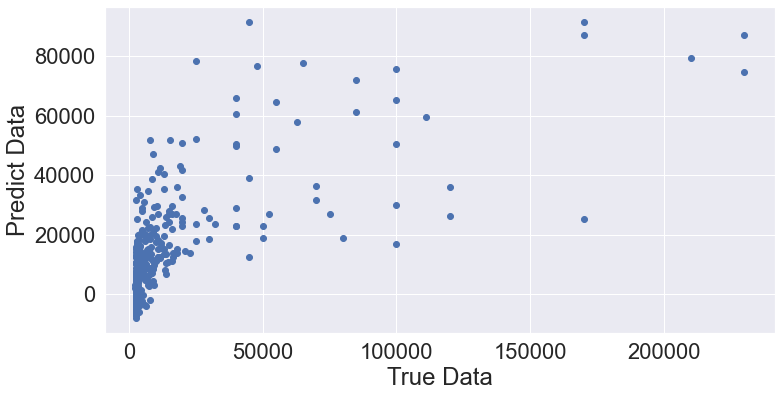


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     77.22
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          5.43e-136
Time:                        21:09:15   Log-Likelihood:                -12320.
No. Observations:                1090   AIC:                         2.467e+04
Df Residuals:                    1077   BIC:                         2.473e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.701e+04   4329.548     -8.548      0.

LinearRegression()

In [384]:
# 원본 데이터로 선형회귀
linearModel(pitcher_1520[use_col[:-1]], pitcher_1520['salary'])

In [236]:
# Scaler - MinMax
mm_model = linearModel(mm_df, mm_salary, showplot=False, scaler= salary_mm_scaler)

MAE(단위 : 만 원) :  16477.35
Test R2 Score :  0.4568659335413362


In [237]:
std_model = linearModel(std_df, std_salary, showplot=False, scaler= salary_std_scaler)

MAE(단위 : 만 원) :  30834.58
Test R2 Score :  0.4568659335413362


In [238]:
rob_model = linearModel(rob_df, rob_salary, showplot=False, scaler= salary_rob_scaler)

MAE(단위 : 만 원) :  20077.35
Test R2 Score :  0.4568659335413364


## 문제3. 타겟(최동원) 데이터 예측 해보기

In [239]:
target_data = pitcher_8388[pitcher_8388['name'] == '최동원']
target_data = target_data.sort_values('year')

In [240]:
# 타켓 데이터 스케일
target_mm = mm_scaler(target_data, use_col[:-1], getScaler=False)
target_std = std_scaler(target_data, use_col[:-1], getScaler=False)
target_rob = rob_scaler(target_data, use_col[:-1], getScaler=False)

# 스케일에 따른 예측값
mm_pred = mm_model.predict(target_mm)
std_pred = std_model.predict(target_std)
rob_pred = rob_model.predict(target_rob)

In [241]:
# 각 예측값 원본으로 복원
mm_pred =  salary_mm_scaler.inverse_transform(mm_pred).round(2)
std_pred = salary_std_scaler.inverse_transform(std_pred).round(2)
rob_pred = salary_rob_scaler.inverse_transform(rob_pred).round(2)

In [242]:
for i in range(len(mm_pred)):
    print("*"*10, target_data['year'].iloc[i], "Predict","*"*10)
    print("{:12} : {:5}" .format("MINMAX Prd",mm_pred[i][0]))
    print("{:12} : {:5}" .format("Standard Prd",std_pred[i][0]))
    print("{:12} : {:5}" .format("Robuster Prd",rob_pred[i][0]))
    print()

********** 1983 Predict **********
MINMAX Prd   : 6287.87
Standard Prd : -11957.33
Robuster Prd : -16662.29

********** 1984 Predict **********
MINMAX Prd   : 74968.26
Standard Prd : 19563.16
Robuster Prd : 6469.55

********** 1985 Predict **********
MINMAX Prd   : 110210.0
Standard Prd : 25075.16
Robuster Prd : 16048.94

********** 1986 Predict **********
MINMAX Prd   : 113197.88
Standard Prd : 32242.51
Robuster Prd : 38710.31

********** 1987 Predict **********
MINMAX Prd   : 90389.64
Standard Prd : 22620.74
Robuster Prd : 31653.2

********** 1988 Predict **********
MINMAX Prd   : 49698.04
Standard Prd : 12368.42
Robuster Prd : 11472.62



### 모델 평가 
 R2 스코어가 Train : 0.47, Test :0.46로 Train에 대한 수치가 절반에도 미치치 못한 수치로 나타났지만 타겟 데이터에 대한 예측을 진행해보았다.
  - MINMAX : 약 8200만 원 ~ 11억 원 사이의 값들이 나왔고 MAE는 1.6억 원 이었음.
  - Standard : 약 -1.2억 원 ~ 3.2억 원 사이의 예측 값이 나왔고 MAE는 3억 원 이었음.
  - Robuster : 약 -1.7억 원 ~ 3.8 억 원 사이의 예측 값이 나왔고 MAE는 약 2억 원 이었음.
   
 3가지 스케일러 중 MINMAX가 가장 좋았다.
   
 모델의 성능을 좀 더 올릴 수 있는 방법에 대해서 고민해 본 결과 사용하고 있는 데이터에 이상점이 있었다. 한 번 연봉 협상을 하고 나면 다음 연봉 협상 전까 연봉에 대한 변화는 없지만 선수의 개인기록의 편차가 클 수 있다는 변수가 있었다. 따라서 데이터를 정재 할 필요가 있어 아래와 같은 진행방향으로 결정하기로 했다.
   - 15~20년도 데이터를 선수, 연봉 순으로 그룹 정렬한 후 나머지 데이터에 대한 평균 값으로 출력하고 회귀분석을 진행.
   - 위 방법으로 예측률이 조금은 상승 될 것으로 예상.

    

## 문제2 - 데이터 매핑(2)
### 데이터 전처리(2)

In [250]:
pivote_1520 = pitcher_1520.pivot_table(index= ['name', 'salary','birth','team'] ,aggfunc=np.mean)
pivote_1520.head()

BB/9   ERA     ERAplus       FIP  \
name salary birth      team                                                 
강동연  2800   1992-12-18 Doosan Bears  3.839286  6.34   77.266667  7.286667   
     3400   1992-12-18 NC Dinos      4.125000  6.00   81.400000  5.140000   
강동호  2700   1994-04-21 Lotte Giants  3.503650  4.79  105.200000  6.080000   
     5100   1994-04-21 Lotte Giants  4.909091  7.36   66.200000  7.280000   
강백호  2700   1999-07-29 Kia Tigers    9.000000  0.00    0.000000  6.400000   

                                       FIPplus       K/9       WAR      WHIP  \
name salary birth      team                                                    
강동연  2800   1992-12-18 Doosan Bears  63.966667  5.639286 -0.016667  1.616667   
     3400   1992-12-18 NC Dinos      94.300000  6.375000  0.060000  1.580000   
강동호  2700   1994-04-21 Lotte Giants  83.000000  5.693431  0.650000  1.430000   
     5100   1994-04-21 Lotte Giants  66.100000  6.545455 -0.020000  1.730000   
강백호  2700   1999-07-29 Kia Tigers    64.900000  0.000000  0.040000  1.000000   

                                      WPA        age  balk     base2  base3  \
name salary birth      team                                                   
강동연  2800   1992-12-18 Doosan Bears -0.16  25.666667   0.0  2.333333    0.0   
     3400   1992-12-18 NC Dinos     -0.62  28.000000   0.0  6.000000    0.0   
강동호  2700   1994-04-21 Lotte Giants  0.34  23.000000   0.0  8.000000    2.0   
     5100   1994-04-21 Lotte Giants  0.09  26.000000   0.0  1.000000    0.0   
강백호  2700   1999-07-29 Kia Tigers    0.02  20.000000   0.0  0.000000    0.0   

                                     batter_faced   cg  earned_run    gp   gs  \
name salary birth      team                                                     
강동연  2800   1992-12-18 Doosan Bears     35.666667  0.0    5.666667   8.0  0.0   
     3400   1992-12-18 NC Dinos        106.000000  0.0   16.000000  22.0  0.0   
강동호  2700   1994-04-21 Lotte Giants    178.000000  0.0   22.000000  27.0  0.0   
     5100   1994-04-21 Lotte Giants     51.000000  0.0    9.000000   7.0  0.0   
강백호  2700   1999-07-29 Kia Tigers        4.000000  0.0    0.000000   1.0  0.0   

                                      hb  hits  hold  home_run  inning  \
name salary birth      team                                              
강동연  2800   1992-12-18 Doosan Bears  0.0   9.0   0.0       2.0     7.8   
     3400   1992-12-18 NC Dinos      1.0  27.0   1.0       3.0    24.0   
강동호  2700   1994-04-21 Lotte Giants  1.0  43.0   0.0       8.0    41.1   
     5100   1994-04-21 Lotte Giants  0.0  13.0   0.0       3.0    11.0   
강백호  2700   1999-07-29 Kia Tigers    0.0   0.0   0.0       0.0     1.0   

                                     intentional_walk  loss         rank  \
name salary birth      team                                                
강동연  2800   1992-12-18 Doosan Bears               0.0   0.0  1015.666667   
     3400   1992-12-18 NC Dinos                   1.0   2.0   865.000000   
강동호  2700   1994-04-21 Lotte Giants               2.0   1.0   493.000000   
     5100   1994-04-21 Lotte Giants               0.0   0.0  1024.000000   
강백호  2700   1999-07-29 Kia Tigers                 0.0   0.0   900.000000   

                                     relief_WAR       runs  save  sho  \
name salary birth      team                                             
강동연  2800   1992-12-18 Doosan Bears   -0.096667   6.333333   0.0  0.0   
     3400   1992-12-18 NC Dinos        0.000000  17.000000   0.0  0.0   
강동호  2700   1994-04-21 Lotte Giants    0.230000  24.000000   0.0  0.0   
     5100   1994-04-21 Lotte Giants   -0.090000   9.000000   0.0  0.0   
강백호  2700   1999-07-29 Kia Tigers     -0.020000   0.000000   0.0  0.0   

                                            so       walk  wild       win  \
name salary birth      team                                                 
강동연  2800   1992-12-18 Doosan Bears   4.666667   3.666667   0.0  0.333333   
     3400   1992-12-18 

In [251]:
pivote_1520.reset_index(inplace=True)
pivote_1520.drop(['year'], axis=1, inplace=True)

In [252]:
len(pivote_1520)

948

Test R2 Score :  0.35041978786505945


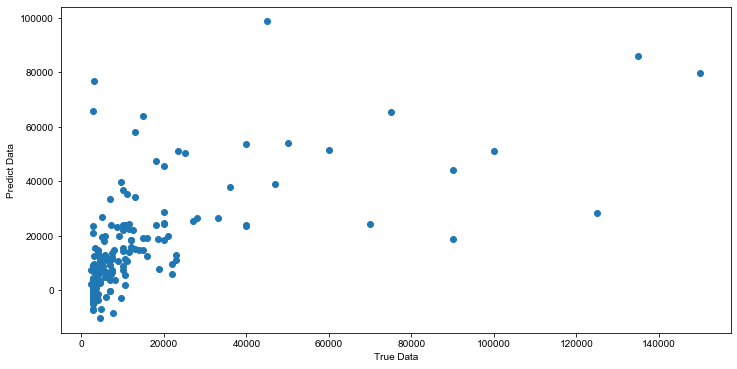


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     57.36
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          7.78e-103
Time:                        19:49:46   Log-Likelihood:                -8539.1
No. Observations:                 758   AIC:                         1.711e+04
Df Residuals:                     744   BIC:                         1.717e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.306e+04   5240.149     -6.309      0.

LinearRegression()

In [253]:
linearModel(pivote_1520[use_col[:-1]], pivote_1520['salary'])

### 그룹 정렬후 결과
정렬 후 Train 데이터에 대한 R2 스코어가 소폭 상승했지만 Test 데이터에서는 크게 하락 했다. 그에 대한 이유를 다시 한 번 생각해 보았고 아래와 같은 결론을 내렸다.
- 높은 연봉을 받았음에도 시즌 중 어떠한 이슈로 인해 낮은 지표들을 기록했다.
- 반대로 낮은 연봉을 받았음에도 시즌 중 뛰어난 지표들을 기록했다.
- 이러한 데이터들이 생각보다 많이 존재했고 그로인해서 연봉 예측률이 크게 떨어졌을 것이다.
- 위와 같은 데이터를 확인하고 예측하기 어려운 표본들이라 한다면 데이터를 다시 정재할 방법을 찾아야 한다.
  
    

### 모델에 사용한 데이터 다시 확인 해보기
- 고액/저액 연봉자 데이터 살펴보기
    - 투수의 이닝수와 팀 평균 이닝수 비교
    - 투수 평가 지표

#### 이닝수 비교

In [254]:
import KTD as KTD #팀 데이터 분석 모듈

# 팀 평균 데이터 가져오기
def getPitcherDataOfTeam(team, df, start_year, end_year):
    con_t = df['team']== team
    con_y = (df['year'] >= start_year) & (df['year'] <= end_year)
    con_df = df[con_t][con_y]

    return con_df

# 입력한 키워드 팀의 투수들의 년도별 데이터 시각화
# KTD.drawAvgTeamData(KTD.findTeamFullName('Lotte',team_pitcher_avg_df), team_pitcher_avg_df)

In [255]:
# 팀 평균 이닝수 가져오기
def findTeamInningAvg(team):
    target_df = getPitcherDataOfTeam(team, team_pitcher_avg_df, 2015, 2020)
    team_pitcher = pitcher_1520[pitcher_1520['team']==team]
    return np.average(target_df['innings_pitched'].values)/len(set(team_pitcher['name']))

In [256]:
# 상위 100명 연봉자 중 팀 평균 이닝보다 낮은 선수들
top100_df = pivote_1520.sort_values('salary', ascending=False)[:100].reset_index(drop=True)

idx_list = []
for idx, rows in top100_df.iterrows():
    team_inning = findTeamInningAvg(rows['team'])
    if rows['inning'] < team_inning:
        idx_list.append(idx)

print("-----"*5, "15-20 시즌 연봉 Top100","-----"*5)
print("팀 평균 이닝보다 낮은 선수 {:3}명" .format(len(top100_df.iloc[idx_list])))

------------------------- 15-20 시즌 연봉 Top100 -------------------------
팀 평균 이닝보다 낮은 선수   6명


In [257]:
# 하위 100명 연봉자 중 팀 평균 이닝보다 높은 선수들
lower100_df = pivote_1520.sort_values('salary', ascending=True)[:100].reset_index(drop=True)

idx_list = []
for idx, rows in lower100_df.iterrows():
    team_inning = findTeamInningAvg(rows['team'])
    if rows['inning'] < team_inning:
        idx_list.append(idx)

print("-----"*5, "15-20 시즌 연봉 Bot100","-----"*5)
print("팀 평균 이닝보다 높은 선수 {:3}명" .format(len(lower100_df.iloc[idx_list])))

------------------------- 15-20 시즌 연봉 Bot100 -------------------------
팀 평균 이닝보다 높은 선수  64명


#### 확인 결과
- 팀 평균 이닝 = (15-20년 이닝의 평균) / (팀에 소속된 선수 수)  
(pivot_df에서 연봉을 기준으로 평균으로 잡아 년도에 대한 데이터가 없어 년도별로 구분 짓기가 어려워 해당 방법으로 계산 하였음. 정확한 팀 평균 이닝과의 비교는 아니지만 근사값과의 비교)

- 15-20년 시즌 중 상위 연봉 100개의 데이터중 6개 데이터가 팀 평균 이닝보다 적게 던졌다. 하위 100개 데이터 중 65개의 데이터가 많이 던졌다.
이를 통해서 알 수 있는것은
    - 고액의 연봉자는 기본적인 이닝수가 충족한다.
    - 반면에 저액 연봉자의 경우 출전의 기회가 많지 않을 것이다. 그런데 충분한 평균 이닝보다 높은 지표를 기록한 선수들이 절반 이상이다.
    - 이런 점에서 예측률이 떨어졌던 이유를 생각해보면 '같은 연봉일때의 평균 지표로 계산하다보니 고액과 저액 연봉자들의 지표에 차이가 줄어들었지만 연봉에는 변화가 없어 예측하기가 어려웠을 것이다.'라는 가설을 세웠고 실제로 투수들의 지표가 어땠는지 살펴보기로 했다.



#### 투수 평가 지표
https://koreascience.kr/article/JAKO201417048539027.pdf 기준을 사용

- ERA (자책점)
    - df data 사용
- K/9 (9이닝당 탈삼진 수)
    - 삼진 * 9 / 이닝
- BB/9 (9이닝당 볼넷 수)
    - 볼넷 *9 / 이닝
- WHIP (이닝당 볼넷과 안타를 내준 수)
    - df data 사용
- FIP (수비의 실책을 제외한 투수의 지표) - 낮을수록 좋음
    - df data 사용

In [258]:
check_cols = ['ERA', 'K/9', 'BB/9', 'WHIP', 'FIP']
top100_df = pivote_1520.sort_values('salary', ascending=False)[:100]
lower100_df = pivote_1520.sort_values('salary', ascending=True)[:100]

In [259]:
#연봉 상위 100명중 평가 지표의 평균 이하 선수들
print('TOP 100 of Salary Pitchers Data')
for col in check_cols:
    col_avg = np.mean(pivote_1520[col])
    if col != 'K/9':
        print("{:10} in bad_player Cnt : {:4}" .format(col, len(top100_df[top100_df[col]>col_avg])))
    else:
        print("{:10} in bad_player Cnt : {:4}" .format(col, len(top100_df[top100_df[col]<col_avg])))


TOP 100 of Salary Pitchers Data
ERA        in bad_player Cnt :    3
K/9        in bad_player Cnt :   45
BB/9       in bad_player Cnt :    2
WHIP       in bad_player Cnt :    5
FIP        in bad_player Cnt :    5


In [260]:
#연봉 하위 100명중 평가 지표의 평균 이상 선수들
print('Lower 100 of Salary Pitchers Data')
for col in check_cols:
    col_avg = np.mean(pivote_1520[col])
    if col != 'K/9':
        print("{:10} in good_player Cnt : {:4}" .format(col, len(lower100_df[lower100_df[col]<col_avg])))
    else:
        print("{:10} in good_player Cnt : {:4}" .format(col, len(lower100_df[lower100_df[col]>col_avg])))


Lower 100 of Salary Pitchers Data
ERA        in good_player Cnt :   65
K/9        in good_player Cnt :   39
BB/9       in good_player Cnt :   63
WHIP       in good_player Cnt :   51
FIP        in good_player Cnt :   44


```
확인 결과
- 연봉이 높은 선수들 중에 지표가 좋지 못한 데이터가 어느정도 존재하고 있음을 확인하였고 9이닝당 탈삼진의 개수가 평균보다 적은 데이터가 절반 정도 존재했다.
- 연봉이 낮은 선수들 중에 좋은 지표를 기록한 선수 데이터가 모든 지표에서 많이 존재하고 있음을 확인함.

따라서 현재 정재된 데이터는 연봉을 예측하기에는 좋지 못한 상태라는 결론을 내렸고 새롭게 정재할 방법을 찾아보았다.

```

## 문제2 - 데이터 매핑(3)
### 데이터 전처리(3)
- 앞서 진행한 전처리에서 지표가 낮음에도 고액의 연봉, 지표가 좋음에도 낮은 연봉의 데이터들이 문제였음.
- 이 부분에 중점을 두어 데이터를 정재하기로 함. 따라서 아래와 같은 순서로 정재를 진행함.
    - 15-20 시즌 중 연봉 협상을 한 선수들의 데이터만을 사용한다.
    - 현재 데이터의 연봉은 해당 년도에 활동한 지표로 산정된 것이 아니라 과거의 기록에 의해 산정된 연봉이다. 따라서 이 부분에 맞게 데이터 처리한다.
        - 연봉은 과거의 데이터와 매칭한다.
        - 매칭하는 데이터는 (6:4) 비율의 가중치를 주고 합산하여 매칭한다.  
        Ex) 연봉 협상시 과거 1년에 대한 데이터만 있다면 그대로 적용. 과거 2년에 대한 데이터는 지난 1년(0.6), 지난 2년(0.4)의 가중치로 적용. 과거 3년에 대한 데이터는 지난 1년(0.6), 지난 2년(0.24), 지난 3년(0.16)의 가중치를 적용한다.
    - 현재 갖고 있는 데이터에는 부상에 대한 정보가 없다. 직접 찾아서 추가하기에는 어려움이 있어 경기수가 적은 경우 부상으로 간주한다. 단, 연봉이 적은 경우 경기 수가 적을 수 밖에 없기 때문에 이 기준은 정리된 데이터중 고액의 연봉을 받는 데이터들에만 적용한다.

In [351]:
pivote2_1520 = pitcher_1520.pivot_table(index=['name','salary','birth','year'])

In [352]:
# 협상에 대한 데이터프레임 제작을 위해 정렬
pivote2_1520 = pivote2_1520.sort_values(['name','birth','year']).reset_index()

In [353]:
# 연봉 협상한 데이터 추출

check_list = []

names = set(pivote2_1520['name'])

changesalray = []

# 이름, 생년월일을 통해서 중복되지 않은 연봉 값이 2개 이상이라면 해당 데이터들의 인덱스 저장
for name in names:

    birth_list = pivote2_1520[pivote2_1520['name'] == name]['birth'].unique()
    
    for birth_day in birth_list:
        if (name, birth_day) not in check_list:
            check_list.append((name, birth_day))
            flag = (pivote2_1520['name']==name) & (pivote2_1520['birth'] == birth_day)
            if len(set(pivote2_1520[flag]['salary'].values)) >=2:
                changesalray.append(pivote2_1520[flag].index.tolist())

In [354]:
# 추출한 데이터 연봉 매칭시켜 데이터프레임 만들기
to_X = []

for p in changesalray:
    modify_data = pivote2_1520.iloc[p[:-1]] # 지난 시즌 성적 데이터. 2020년 데이터에 따른 연봉 데이터(2021)가 없기 때문에 뽑지 않음. 
    change_sa = pivote2_1520['salary'].iloc[p[1:]].to_list() # 연봉 데이터. 2015년의 연봉은 2014년 데이터가 없기 때문에 뽑지 않음.
    modify_data['salary']= change_sa # 연봉과 데이터 매칭
    to_X.append(modify_data)

to_X = pd.concat(to_X)

In [355]:
to_X.reset_index(drop=True, inplace=True)

In [356]:
# 15-20년 모든 시즌의 연봉의 평균보다 높은 연봉을 받는데 경기수가 15경기 미만인 선수 리스트
tmp = to_X[to_X['salary']>=np.average(to_X['salary'])]
check_data = tmp[tmp['gp']<14]
check_name = check_data['name'].tolist()

In [357]:
to_X = to_X.drop(index=check_data.index.to_list())
to_X = to_X.reset_index(drop=True)

In [412]:
# 가중치 계산 함수
def gravi(df_list):
    result = []
    for df in df_list:
        df_len = len(df)

        ratio = [1]
        for _ in range(1,df_len):
            tmp = ratio.pop(-1)
            ratio.append(round(tmp*0.6,2))
            ratio.append(round(tmp*0.4,2))
            
        result.append(ratio)

    return result

# 데이터 프레임에서 각각 선수에 대한 데이터 분리
def div_pit(df):
    names = df['name'].unique()

    tmp =[]

    for name in names:
        tmp_df = df[df['name'] == name]
        births = tmp_df['birth'].unique()
        if len(births) == 1 : 
            tmp.append(tmp_df)
        else:
            for birth in births:
                tmp_df2 = tmp_df[tmp_df['birth'] == birth]
                tmp.append(tmp_df2)

    return tmp
    
# 같은 연봉끼리 묶어주기
def div_salary(df):
    salarys = set(df['salary'].values)
    
    tmp = []
    for s in salarys:
        tmp.append(df[df['salary']==s])

    return tmp


In [359]:
# 결측값 확인
pd.DataFrame(to_X.isnull().sum())

,0
name,0
salary,0
birth,0
year,0
BB/9,0
ERA,0
ERAplus,0
FIP,0
FIPplus,0
K/9,0


In [360]:
tmp = div_pit(to_X) # 선수 총 수
tmp2 = [] # 선수의 연봉 협상 데이터
for t in tmp:
    tmp2.append(div_salary(t))

tmp3 = [] # 선수의 연봉 협상시 가중치 리스트
for t2 in tmp2:
    tmp3.append(gravi(t2))

In [368]:
cols = ['name','age','gp','gs', 'win', 'sho', 'save',
        'inning', 'hits', 'ERA', 'WHIP', 'WAR', 'FIP', 'relief_WAR', 'K/9', 'BB/9']

p_list = []
for idx1, t2 in enumerate(tmp2): # 연봉 전체 데이터
    for idx2, t in enumerate(t2): # 선수 개인 연봉 데이터
        t = t.reset_index(drop=True)
        p_list2 = []
        for col in cols: #컬럼
            sum = 0
            flag = True # 연속형, 범주형 구분

            for idx3 in range(0,len(t)): #가중치 
                try:
                    if col == 'age':
                        sum += t[col][idx3]
                    else:
                        sum += t[col][idx3] * tmp3[idx1][idx2][-(idx3+1)]
                except: # 컬럼이 숫자가 아니면 에러 발생
                    flag = False
                    break

            if flag:
                if col =='age':
                    sum /= len(t) # 나이는 평균으로 계산
                p_list2.append(sum) # 가중치 계산값 추가
            else:
                p_list2.append(t[col][idx3]) # 숫자 칼럼 아닐경우 추가
        p_list2.append(t['salary'][0])
        p_list.append(p_list2)
        # break
    

cols = ['name','age','gp','gs', 'win', 'sho', 'save',
        'inning', 'hits', 'ERA', 'WHIP', 'WAR', 'FIP', 'relief_WAR', 'K/9', 'BB/9', 'salary']

            
nego_df = pd.DataFrame(p_list, columns=cols)


#### 데이터 모델 적용

Test R2 Score :  0.599366921397658


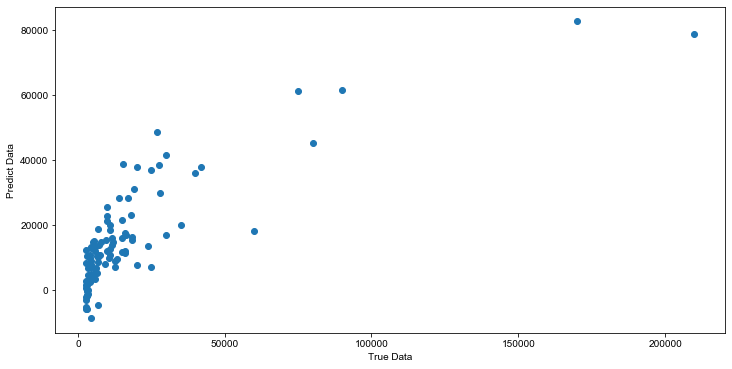


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     35.33
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.26e-58
Time:                        20:43:54   Log-Likelihood:                -4670.9
No. Observations:                 419   AIC:                             9370.
Df Residuals:                     405   BIC:                             9426.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.806e+04   7066.075     -3.971      0.

In [370]:
# 투수 평가에 유의미한 지표들만 예측 컬럼으로 사용

# use_col = ['age','gp','gs', 'win',
#         'inning', 'hits', 'ERA', 'WHIP', 'WAR', 'FIP', 'relief_WAR', 'K/9', 'BB/9']
 
model = linearModel(nego_df[use_col[:-1]], nego_df[use_col[-1]])

Train 데이터에 대해서는 0.53, Test 데이터에 0.6으로 이전보다 확연히 높아진 R2 스코어를 보여주었다. 어느정도 데이터에 대한 정재가 됐다고 판단하고 다른 모델에도 적용하여 좋은 모델을 찾아보기로 하였다.

### 여러 모델을 통한 예측

In [385]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit,GridSearchCV
from sklearn.pipeline import Pipeline

use_col = ['age','gp','gs', 'win',
        'inning', 'hits', 'ERA', 'WHIP', 'WAR', 'FIP', 'K/9', 'BB/9', 'salary']

# X = test_df[use_col]
# y = test_df['salary']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=0)


cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state = 42)

mms = MinMaxScaler()
std = StandardScaler()
rob = RobustScaler()

sclaers = [mms, std, rob]

pipe_linear = Pipeline([
               ('fit', LinearRegression())])
pipe_gbr = Pipeline([
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                 ('fit', RFR())])
pipe_pca = Pipeline([
                ('pca', PCA()),
                ('fit', Ridge(random_state = 42))
])


grid_params_linear = [{
    "fit__fit_intercept" : [True, False],
}]

min_samples_split_range = [0.5, 0.7 , 0.9]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] ,
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]

pipe = [
    pipe_linear , pipe_gbr , pipe_rfr, pipe_pca
]

params = [
    grid_params_linear , grid_params_gbr , grid_params_rfr, grid_params_pca
]

jobs = -1

scaler_dict = {
    0 : 'MMS',
    1 : 'STD',
    2 : 'ROB',
    3 : 'PCA'
}

grid_dict = {
   0: 'Linear',
   1: "GradientBoostingRegressor" ,
   2: "RandomForestRegressor",
   3 : 'PCA Regression'
   }

model_mse = {}
model_r2 = {}
model_best_params = {}

scale_data = {}
for idx1, scaler in enumerate(sclaers):
    to_scale_df = nego_df[use_col]

    scaled_data = scaler.fit_transform(to_scale_df)

    to_scale_df = pd.DataFrame(scaled_data, index=to_scale_df.index, columns=use_col)

    X = to_scale_df[use_col[:-1]]
    y = to_scale_df['salary']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

    isBest = 0
    tmp = []

    for idx2 , (param , model) in enumerate(zip(params , pipe)) :
        search = GridSearchCV(model, param ,
                            cv=cv , n_jobs=jobs , verbose=-1 )
        search.fit(X_train , y_train)
        y_pred = search.predict(X_test)
        
        r2_1 = search.score(X_train, y_train)
        r2_2 = r2(y_test, y_pred)

        if abs(r2_1 - r2_2) > 0.1 : continue # 테스트와 트레인 예측률에 차이가 0.1 이상이라면 패스
        
        r_score = ((r2_1 + r2_2) / 2).round(2)


        if isBest < r2(y_test, y_pred):
            tmp = [idx2, mse(y_test, y_pred), r_score, search.best_params_]
            isBest = r2(y_test, y_pred)
    
    scale_data[scaler_dict.get(idx1)] = [X_train, X_test, y_train, y_test]

    model_mse[scaler_dict.get(idx1) + " " + grid_dict.get(tmp[0])] = tmp[1]
    model_r2[scaler_dict.get(idx1) + " " + grid_dict.get(tmp[0])] = tmp[2]
    model_best_params[scaler_dict.get(idx1) + " " + grid_dict.get(tmp[0])] = tmp[3]

print("finish")
print("*"*10, ' RESULT BEST Params ', "*"*10)
for key, value in model_best_params.items():
    print("{:10} : {}" .format(key, value))


finish
**********  RESULT BEST Params  **********
MMS GradientBoostingRegressor : {'fit__loss': 'huber', 'fit__max_depth': 7, 'fit__max_features': 'log2', 'fit__min_samples_split': 0.9}
STD Linear : {'fit__fit_intercept': False}
ROB Linear : {'fit__fit_intercept': False}


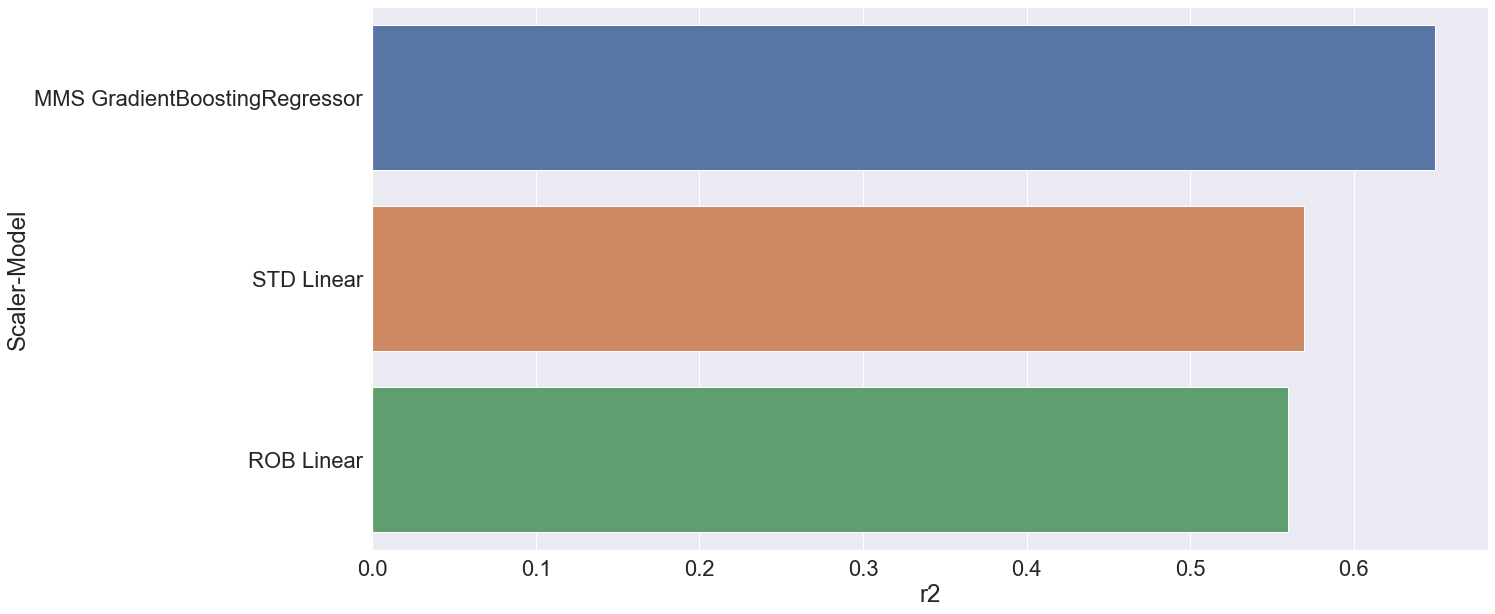

In [386]:
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["Scaler-Model","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="Scaler-Model", x="r2", data=output)
plt.show()

In [387]:
gbr = GBR(loss='huber', max_depth=7, max_features='log2', min_samples_split=0.9)

# lm = LinearRegression(fit_intercept=True)
# tree = RFR(max_depth=6, max_features='sqrt', min_samples_split=0.5)

## 문제3. 타겟(최동원) 데이터 예측

#### 1년마다 협상시 예상 연봉

In [388]:
from math import *
from sklearn.metrics import mean_absolute_error
model = gbr.fit(scale_data['MMS'][0], scale_data['MMS'][2])
y_predictions = model.predict(scale_data['MMS'][0])
print(sqrt(mean_absolute_error(scale_data['MMS'][2], y_predictions))) # train RMSE score를 출력
y_predictions = model.predict(scale_data['MMS'][1])
print(sqrt(mean_absolute_error(scale_data['MMS'][3], y_predictions))) # test RMSE score를 출력

0.15175995525709385
0.17272455577744367


In [389]:
target_data.sort_values('year', inplace=True)

In [390]:
target_scale = mms.fit_transform(target_data[use_col[:-1]])
salary_scaler = MinMaxScaler().fit(nego_df[['salary']])

model = gbr.fit(scale_data['MMS'][0], scale_data['MMS'][2])
gbr_target_pred = model.predict(target_scale)

gbr_target_pred = salary_scaler.inverse_transform(gbr_target_pred.reshape(-1,1))

# model = lm.fit(X_train, y_train)
# lm_target_pred = model.predict(target_data[use_col])

# model = tree.fit(X_train, y_train)
# tree_target_pred = model.predict(target_data[use_col])

In [392]:
# print("Linear Predict")
# for i in range(len(lm_target_pred)):
#     print("{}년 최동원 예측 연봉 : {:.2f} 만원" .format(target_data['year'].iloc[i], lm_target_pred[i]))
# print()

print("GBR Predict")
for i in range(len(gbr_target_pred)):
    print("{}년 최동원 예측 연봉 : {:.2f} 만원" .format(target_data['year'].iloc[i], gbr_target_pred[i][0]))
print()

# print("RandomTree Predict")
# for i in range(len(tree_target_pred)):
#     print("{}년 최동원 예측 연봉 : {:.2f} 만원" .format(target_data['year'].iloc[i], round(tree_target_pred[i])))

GBR Predict
1983년 최동원 예측 연봉 : 15423.27 만원
1984년 최동원 예측 연봉 : 131349.50 만원
1985년 최동원 예측 연봉 : 51975.89 만원
1986년 최동원 예측 연봉 : 94507.88 만원
1987년 최동원 예측 연봉 : 28583.74 만원
1988년 최동원 예측 연봉 : 33072.75 만원



#### 연봉 협상 기간에 텀이 있을 경우
- 2, 3년 협상 기간으로 예측

In [420]:
# 2,3년마다 계약했을 경우

div2_target = []
div3_target = []

for i in range(1, len(target_data)):
    if i % 2 == 1:
        div2_target.append(target_data.iloc[[i-1, i]])  
    
    if i % 3 == 2:
        div3_target.append(target_data.iloc[[i-2, i-1, i]])

ratio2_list = gravi(div2_target)
ratio3_list = gravi(div3_target)

In [427]:
def div23_target(df_list, ratio_list):

    cols = ['name','age','gp','gs', 'win', 'sho', 'save',
            'inning', 'hits', 'ERA', 'WHIP', 'WAR', 'FIP', 'relief_WAR', 'K/9', 'BB/9']

    p_list = []
    for idx2, t in enumerate(df_list): # 선수 개인 연봉 데이터
        t = t.reset_index(drop=True)
        p_list2 = []
        for col in cols: #컬럼
            sum = 0
            flag = True # 연속형, 범주형 구분

            for idx3 in range(0,len(t)): #가중치 
                try:
                    if col == 'age':
                        sum += t[col][idx3]
                    else:
                        sum += t[col][idx3] * ratio_list[idx2][-(idx3+1)]
                except: # 컬럼이 숫자가 아니면 에러 발생
                    flag = False
                    break

            if flag:
                if col =='age':
                    sum /= len(t) # 나이는 평균으로 계산
                p_list2.append(sum) # 가중치 계산값 추가
            else:
                p_list2.append(t[col][idx3]) # 숫자 칼럼 아닐경우 추가

        p_list.append(p_list2)
        # break
        

    cols = ['name','age','gp','gs', 'win', 'sho', 'save',
            'inning', 'hits', 'ERA', 'WHIP', 'WAR', 'FIP', 'relief_WAR', 'K/9', 'BB/9']

                
    return pd.DataFrame(p_list, columns=cols)


In [429]:
div2_target = div23_target(div2_target, ratio2_list)
div3_target = div23_target(div3_target, ratio3_list)

In [456]:
div2_scale = mms.fit_transform(div2_target[use_col[:-1]])
div3_scale = mms.fit_transform(div3_target[use_col[:-1]])

div2_pred = model.predict(div2_scale)
div3_pred = model.predict(div3_scale)

div2_pred = salary_scaler.inverse_transform(div2_pred.reshape(-1,1)).tolist()
div3_pred = salary_scaler.inverse_transform(div3_pred.reshape(-1,1)).tolist()

In [457]:
t2 = []
t3 = []

for i in range(len(target_data)):
    if i % 2 == 1:
        t2.append(div2_pred.pop(0)[0])
    else:
        t2.append(0)

    if i % 3 == 2:
        t3.append(div3_pred.pop(0)[0])
    else:
        t3.append(0)
    

In [458]:
t1 = []
for pred1 in gbr_target_pred:
    t1.append(pred1[0])

In [474]:
target_predict = pd.DataFrame({
    'year' : target_data['year'].values,
    'Nego of 1year' : t1,
    'Nego of 2year' : t2,
    'Nego of 3year' : t3
})

target_predict = target_predict.set_index('year').T

In [475]:
round(target_predict,-2).astype('int')

year,1983,1984,1985,1986,1987,1988
Nego of 1year,15400,131300,52000,94500,28600,33100
Nego of 2year,0,88100,0,86800,0,33100
Nego of 3year,0,0,110700,0,0,34400


타겟(최동원) 데이터가 가장 높은 연봉을 받을 수 있는 경우는 1년마다 협상시 84년에 약 13억으로 예측 된다.  
두번째로 높은 금액은 3년마다 계약시 85년에 약 11억에 협상이 가능할 것으로 예측 된다.  
따라서 타겟 데이터는 1년마다 연봉 협상을 했을때 총액이 가장 많았고 그 다음으로 3년, 2년 협상 기간 순이었다.